<a href="https://colab.research.google.com/github/anthonymelson/portfolio/blob/master/N_Multi_Armed_Bandits_W_Thompson_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling for Multi-Armed Bandit Problem
This notebook contains a solution to an N-Bandit problem.  It is meant to be highly verbose and easy to follow for those who are trying to better understand Thompson Sampling.

## Import Packages

In [0]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt


# Initialize Matrices and Counters
1. **N** =  Number of Machines (Bandits)
2. **machine_probs**  = Probability of Each Machine Winning
3. **rounds** = Total Plays
4. **wins** = Tracks Wins for Each Machine
5. **losses** = Tracks Losses for Each Machine
6. **total_reward** = Tracks Overall Wins for All Rounds
7. **machine_played** =  Tracks Total Plays for Each Machine

The bandits probabilities are given by a random uniform selection that creates a different probability for each that lies between the low and high parameters.  The number of machines is modifiable by changing N.

This example uses 12 bandits, and sets the range for their win probabilities between 0.3 and 0.8.  However, the code below will handel any number of bandits and can accept any range where: $0 < lower_bound < upper_bound < 1$

In [0]:
N = 12 
machine_probs = np.random.uniform(low=0.3, high=0.8, size=N).round(2) 
rounds = 500 
wins = np.zeros(N) 
losses = np.zeros(N) 
total_reward = 0 
machine_played = [] 

## Thompson Sampling Algorithm
1. Loops through number of rounds
2. Iterates through machines in each round
3. Samples from betavariate distribution (which changes based on rewards and becomes less random as the algorithm learns)
4. Selects machine based on sampling and comparision of scores
5. Plays machine given its actual probabilities
6. Gets reward based on outcome
7. Updates wins and losses (used to weight betavariate distribution in subsequent rounds) based on reward

In [0]:
# Iterate Through Rounds
for i in range(0, rounds):
    probs = np.zeros(N) # Store Each Machine's Draw to be Played
    
    # Iterate Through Machines
    for machine in range(0, N):
        probs[machine] = random.betavariate(wins[machine] + 1, losses[machine] + 1) # Draw Based on Previous Results and Randomness

    selected_machine = np.argmax(probs) # Machine With Best Draw
    machine_played.append(selected_machine) # Collect Machine With Best Draw
    
    # Simulate Playing the Selected Machine, and Collect Reward
    reward = np.random.choice([0,1],1, p = [1 - machine_probs[selected_machine], machine_probs[selected_machine]])
    
    # Count Wins, Losses, and Reward
    if reward == 1:
        wins[selected_machine] = wins[selected_machine] + 1
    else:
        losses[selected_machine] = losses[selected_machine] + 1
    total_reward = total_reward + reward



## Show Results in DataFrame

In [19]:
# Create and Print DataFrame with Wins, Losses, and Probabilities of Machine
df = pd.DataFrame(wins, columns=['Wins'])
df['Losses'] = losses
df['Actual Prob'] = machine_probs
display(df)
print()
print(f"Machine {np.argmax(wins)} Won the Most, with {int(wins[np.argmax(wins)])} wins")
print(f"The Optimal Machine to Play was: {np.argmax(machine_probs)}")
print(f"Total Reward: {total_reward[0]}")



,Wins,Losses,Actual Prob
0,8.0,10.0,0.36
1,3.0,7.0,0.42
2,0.0,4.0,0.33
3,21.0,11.0,0.63
4,4.0,6.0,0.58
5,0.0,3.0,0.35
6,8.0,8.0,0.46
7,80.0,36.0,0.65
8,14.0,10.0,0.76
9,168.0,64.0,0.70



Machine 9 Won the Most, with 168 wins
The Optimal Machine to Play was: 8
Total Reward: 324


## Plot Results as Histogram

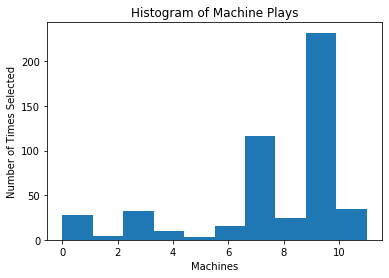

In [20]:
# Plot Histogram of Total Plays For Each Machine
plt.hist(machine_played)
plt.title('Histogram of Machine Plays')
plt.xlabel('Machines')
plt.ylabel('Number of Times Selected')
plt.show()